<a href="https://colab.research.google.com/github/pedsanches/C-digos_GA/blob/main/GA_Caixeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import random
import matplotlib.cm as cm
from numpy import loadtxt
import pandas as pd
import re
import time
import networkx as nx
#import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import imageio
from matplotlib.animation import FuncAnimation
from IPython import display


#*GeraBase*

In [ ]:

dist_maxima = 1000
matriz = [
        [
            0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354,
            468, 776, 662
        ],
        [
            548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674,
            1016, 868, 1210
        ],
        [
            776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164,
            1130, 788, 1552, 754
        ],
        [
            696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822,
            1164, 560, 1358
        ],
        [
            582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708,
            1050, 674, 1244
        ],
        [
            274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628,
            514, 1050, 708
        ],
        [
            502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856,
            514, 1278, 480
        ],
        [
            194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320,
            662, 742, 856
        ],
        [
            308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662,
            320, 1084, 514
        ],
        [
            194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388,
            274, 810, 468
        ],
        [
            536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764,
            730, 388, 1152, 354
        ],
        [
            502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114,
            308, 650, 274, 844
        ],
        [
            388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194,
            536, 388, 730
        ],
        [
            354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0,
            342, 422, 536
        ],
        [
            468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536,
            342, 0, 764, 194
        ],
        [
            776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274,
            388, 422, 764, 0, 798
        ],
        [
            662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730,
            536, 194, 798, 0
        ],
    ]

locations = \
            [(4, 4),  
             (2, 0), (8, 0), 
             (0, 1), (1, 1),
             (5, 2), (7, 2),
             (3, 3), (6, 3),
             (5, 5), (8, 5),
             (1, 6), (2, 6),
             (3, 7), (6, 7),
             (0, 8), (7, 8),]


num_cidades = len(matriz[0])
print(num_cidades)

17


#GeraPOP

In [ ]:
def gera_indv():
  indv = []
  while len(indv) != num_cidades:
    r = random.randint(1, num_cidades)
    if r not in indv:
      indv.append(r)
  return indv.copy()

#Crossover

In [ ]:
taxa_crossover = 0.5
taxa_mut = 0.5

def crossover(pai1,pai2):
  filho1 = []
  filho2 = []
  pcut1 = random.randint(0, num_cidades-3)
  pcut2 = random.randint(pcut1+1, num_cidades-2)
  #pcut1 = 2
  #pcut2 = 5
  end1 = []
  end2 = []
  start1 = []
  start2 = []
  retorno = []
  
  #print(pcut1,pcut2)
  cont = 0
  cont2 = 0
  if(random.random() <= taxa_crossover):
    for i in range(num_cidades):
      filho1.append(0)
      filho2.append(0)


    #colocando o meio dos dois pais nos filhos
    for i in range(pcut2+1):
      if(i <= pcut1):
        continue    
      #print(i)
      filho1[i] = (pai1[i])
      filho2[i] = (pai2[i])

    for i in range(num_cidades):
      if(i <= pcut2):
        continue    
      #print(i)
      if(pai2[i] not in filho1):
        end1.append(pai2[i])

      if(pai1[i] not in filho2):
        end2.append(pai1[i])
    
    for i in range(pcut2+1):
      if(pai2[i] not in filho1):
        start1.append(pai2[i])

      if(pai1[i] not in filho2):
        start2.append(pai1[i])

    for i in range(num_cidades):
      if(i <= pcut2):
        continue
      filho1[i] = (end1+start1)[cont] 
      filho2[i] = (end2+start2)[cont]
      cont+=1
    
    for i in range(pcut1+1):
      filho1[i] = (end1+start1)[cont] 
      filho2[i] = (end2+start2)[cont]
      cont+=1
    
  else:
    filho1 = pai1.copy()
    filho2 = pai2.copy()

  if(random.random()<=taxa_mut):
      num = random.randint(1,3)
      if(num==1):
        filho1 = mutacao_2opt(filho1.copy())
      if(num==2):
        filho1 = mutacao_insert(filho1.copy())
      if(num==3):
        filho1 = mutacao_swap(filho1.copy())
        
    
  if(random.random()<=taxa_mut):
      num = random.randint(1,3)
      if(num==1):
        filho2 = mutacao_2opt(filho2.copy())
      if(num==2):
        filho2 = mutacao_insert(filho2.copy())
      if(num==3):
        filho2 = mutacao_swap(filho2.copy())

  #print((end1+start1),end2+start1)
  #print(filho1, filho2)
  #for i in range(pcut1+1):
    #start1.append(pai1[i])
    #start2.append(pai2[i])

  #for i in range(num_cidades):
    #if(i <= pcut1):
      #completo1.append(start1[i])
      #completo2.append(start2[i])
    #else:
       #if(i <= pcut2):
         #completo1.append(middle1[i-pcut1-1])
         #completo2.append(middle2[i-pcut1-1])
       #else:
          #completo1.append(end1[i-pcut2-1])
          #completo2.append(end2[i-pcut2-1])
    
    
  #filho1.insert(0,8)
  #filho1.insert(1,9)
  #print("Pontos de corte: ",pcut1,pcut2," filhos:",filho1,filho2)    
  #print(completo1,completo2)
  #print(start1,middle1,end1)  
  #print(start2,middle2,end2)
  retorno.append(filho1.copy())
  retorno.append(filho2.copy())
  return retorno.copy()
  

#Mutação

In [ ]:
def mutacao_2opt(indv):
  if(len(indv)==18):
   del(indv[17])
  aux = [] 
  while(len(aux)!= 2):
    numero = random.randint(0,len(indv)-1)
    if(numero not in aux):
      aux.append(numero)
  #print(len)
  #print(indv[aux[0]]-1,indv[aux[1]]-1)
  #print("i,j:",matriz[indv[aux[0]]-1][indv[aux[0]+1]-1], " k,m:", matriz[indv[aux[1]]-1][indv[aux[1]+1]-1])
  #print("i,m:",matriz[indv[aux[0]]-1][indv[aux[1]+1]-1]," k,j:", matriz[indv[aux[1]]-1][indv[aux[0]+1]-1])
  if(aux[0] == len(indv)-1):
    if((matriz[indv[aux[0]]-1][0] + matriz[indv[aux[1]]-1][indv[aux[1]+1]-1]) > (matriz[indv[aux[0]]-1][indv[aux[1]+1]-1] + matriz[indv[aux[1]]-1][0])):
      num_j = indv[0]
      num_m = indv[aux[1]+1]
      indv[0] = num_m
      indv[aux[1]+1] = num_j
  if (aux[1] == len(indv)-1):
    if((matriz[indv[aux[0]]-1][indv[aux[0]+1]-1] + matriz[indv[aux[1]]-1][0]) > (matriz[indv[aux[0]]-1][0] + matriz[indv[aux[1]]-1][indv[aux[0]+1]-1])):
      num_j = indv[aux[0]+1]
      num_m = indv[0]
      indv[aux[0]+1] = num_m
      indv[0] = num_j
  if(aux[1] != len(indv)-1 and aux[0] != len(indv)-1):
    #print(aux[0],aux[1])
    if((matriz[indv[aux[0]]-1][indv[aux[0]+1]-1] + matriz[indv[aux[1]]-1][indv[aux[1]+1]-1]) > (matriz[indv[aux[0]]-1][indv[aux[1]+1]-1] + matriz[indv[aux[1]]-1][indv[aux[0]+1]-1])):
      
      num_j = indv[aux[0]+1]
      num_m = indv[aux[1]+1]
      indv[aux[0]+1] = num_m
      indv[aux[1]+1] = num_j

  return indv.copy()

In [ ]:
def mutacao_swap(indv):
  if(len(indv)==18):
   del(indv[17])
  n1 = n2 = random.randint(0,num_cidades-1)
  aux2 = aux1 = indv[n1]
  while(aux2 == aux1):
    n2 = random.randint(0,num_cidades-1)
    aux2 = indv[n2]
  indv[n1] = aux2
  indv[n2]  = aux1
  return  indv.copy()

In [ ]:
def mutacao_insert(indv):
  if(len(indv)==18):
   del(indv[17])
  n1 = n2 = random.randint(0,num_cidades-1)
  while(n1 == n2):
    n2 = random.randint(0,num_cidades-1)
  aux = indv[n1]
  del(indv[n1])
  i = len(indv)
  indv.append(0)
  while(i >=0 ):
    indv[i] = indv[i-1]
    i-=1
    if(i == n2):
      break
  indv[n2] = aux
  return indv.copy()

#Fitness


In [ ]:
def fitness(indv):
    soma_dist = 0
    for i in range(num_cidades):
      if(i == num_cidades-1):
        soma_dist += matriz[indv[i]-1][0]
      else: 
        soma_dist += matriz[indv[i]-1][indv[i+1]-1]
      #print(matriz[indv[i]-1][indv[i+1]-1],soma_dist)
    
    if(len(indv) == num_cidades+1):
      indv[num_cidades] = soma_dist
    else:
      indv.append(soma_dist)
    return indv.copy()

#Roleta

In [ ]:
def Roleta(pop):
  soma_fitness = 0
  soma_aux = 0
  for i in range(tam_pop):
    soma_fitness += pop[i][num_cidades]
  
  int_aux = random.randint(0,soma_fitness)
  
  for i in range(tam_pop):
    if(soma_aux <= int_aux and int_aux<= (soma_aux + pop[i][num_cidades])):
      return pop[i].copy()
    soma_aux += pop[i][num_cidades]
  return pop[i].copy()

#Sobrevivência

In [ ]:
def sobreviv_metade(select,pais):
    select += pais.copy()

    for i in range(tam_pop):
      select[i] = fitness(select[i].copy())

    select.sort(key= lambda fitness : fitness[num_cidades])

    del select[tam_pop:]
    #print(len(select))

    return select.copy()

In [ ]:
def sobreviv_melhorpai(select,pais,numero):
  sorteados = []
  pais.sort(key= lambda fitness : fitness[num_cidades])
  for i in range(numero):
    aux = random.randint(0,num_cidades-1)
    if(aux not in sorteados):
      select[aux] = pais[i].copy()
      sorteados.append(aux)
    else:
      i-=1
  return select.copy()

#MediaFitness

In [ ]:
def calc_media(vet):
  soma = 0
  for i in range(tam_pop):
    soma += vet[i][num_cidades]
  
  return soma/tam_pop


#Desenha Grafo

In [ ]:
def desenha(indv,inc):
  mum = 1
  x = []
  y = []
  for i in indv:
    if(i>=num_cidades):
      continue
    x.append(locations[i-1][0])
    y.append(locations[i-1][1])

  a_scale = float(max(x))/float(100)
  fig = plt.figure()
  plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
          color ='b', length_includes_head=True)
  for i in range(0,len(x)-1):
      plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
              color = 'b', length_includes_head = True)

  plt.xlim(-2, 10)
  plt.ylim(-2, 10)
  plt.title(inc)
  fig.canvas.draw()       # draw the canvas, cache the renderer
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

  return image

def testa(lista_pais):
  kwargs_write = {'fps':4, 'quantizer':'nq'}
  imageio.mimsave('./powers.mp4', [desenha(lista_pais[i],i) for i in range(len(lista_pais))], fps=4)



In [ ]:
def plot_tour(tour, style='bo-'): 
    "Plot every city and link in the tour, and highlight start city."
    if len(tour) > 1000: plt.figure(figsize=(15, 10))
    start = tour[0:1]
    plot_segment(tour + start, style)
    plot_segment(start, 'rD')

def plot_segment(segment, style='bo-'):
    "Plot every city and link in the segment."
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
    plt.axis('scaled')
    plt.axis('off')
    
def X(city): "X coordinate."; return city.real
def Y(city): "Y coordinate."; return city.imag

def gera_resultado(caminho):
  resultado = []
  City = complex
  for i in range(num_cidades):
    resultado.append(City(locations[caminho[i]-1][0],locations[caminho[i]-1][1]))
  return resultado.copy()


#Main

In [ ]:
global tam_pop
global pop
geracao_g = 200
tam_pop = 200
pop = []

def main():
  pop = []
  filhos = []
  todas_medias = []
  todos_mel_pais = []
  geracoes = 0
  for i in range(tam_pop):
    pop.append(gera_indv().copy())

  while(True):
    geracoes +=1
    for i in range(tam_pop):
      pop[i] = fitness(pop[i].copy())

    pop.sort(key= lambda fitness : fitness[num_cidades])
    #desenha(pop[0])
    todas_medias.append(calc_media(pop.copy()))
    todos_mel_pais.append(pop[0])

    for i in range(int (tam_pop/2)):
      filhos += crossover(Roleta(pop),Roleta(pop)).copy()
    
    pop = sobreviv_metade(filhos.copy(),pop.copy()).copy()
    #pop = sobreviv_melhorpai(filhos.copy(),pop.copy(),15).copy()
    filhos = []
    if(geracoes == geracao_g):
      break
    

  return [geracoes,todas_medias, todos_mel_pais]

#Gráficos:


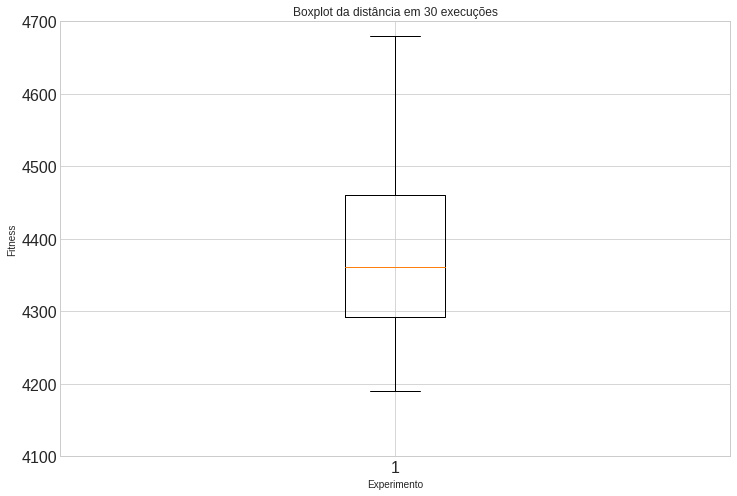

In [ ]:
num_repet = 30
maiores1 = []
maiores2 = []
maiores3 = []

somatotal1 = 0

for i in range(num_repet):
  start = time.perf_counter()

  #1
  geracao_g = 50
  tam_pop = 800
  taxa_crossover = 0.5
  taxa_mut = 0.8
  run1 = main()

  #2
  geracao_g = 50
  tam_pop = 400
  taxa_crossover = 0.5
  taxa_mut = 0.8
  #run2 = main()

  #3
  geracao_g = 1
  tam_pop = 1
  taxa_crossover = 0.6
  taxa_mut = 0.8
  #run3 = main()
  
  
  
  end = time.perf_counter()
  medias = run1[1]

  geracao1 = run1[0]
  mel_pais1 = run1[2]
  fit_melpais1 = []

  #geracao2 = run2[0]
  #mel_pais2 = run2[2]
  #fit_melpais2 = []

  #geracao3 = run3[0]
  #mel_pais3 = run3[2]
  #fit_melpais3 = []

  for i in range(geracao1):
    fit_melpais1.append(mel_pais1[i][num_cidades]) 
    del(mel_pais1[i][num_cidades])
  #for i in range(geracao2):
    #fit_melpais2.append(mel_pais2[i][num_cidades]) 
    #del(mel_pais2[i][num_cidades])
  #for i in range(geracao3):
    #fit_melpais3.append(mel_pais3[i][num_cidades]) 
    #del(mel_pais3[i][num_cidades])
  #plt.plot(range(run1[0]), medias,label = 'Média')
  #plt.plot(range(run1[0]), fit_melpais1,label = 'Melhores pais')
  #plt.title("Convergência em uma das execuções")
  #plt.xlabel('Geração')
  #plt.ylabel('Fitness')
  #plt.legend()
  #plt.show()
  
  #print(fit_melpais[geracao-1])
  #plt.plot(range(geracao), medias)
  #plt.title("Media de cada geração")
  #plt.show()
  #print("Tempo de execução com ",geracao,"geracoes: ",(end-start)/1000,"ms")
  #plot_tour(gera_resultado(mel_pais[geracao-1]))
    
  #def update(i):  
    #x.append(i)  
    #ysin.append(np.sin(i))  
    #ycos.append(np.cos(i))  
    #ln1.set_data(x, ysin)  
    #ln2.set_data(x, ycos)
  
  #ani = FuncAnimation(fig, update, np.linspace(0, 2*np.pi, 64), init_func=init)  
  #plt.show()

  #plt.title(fit_melpais[geracao-1])

  #plt.show()

  #testa(mel_pais)
  fit_melpais1.sort()
  #fit_melpais2.sort()
  #fit_melpais3.sort()
  maiores1.append(min(fit_melpais1))
  #maiores2.append(min(fit_melpais2))
  #maiores3.append(min(fit_melpais3))

maiores1.sort()
#maiores2.sort()
#maiores3.sort()

#for i in range(len(maiores)):
  #somatotal1 += maiores[i]


plt.figure(figsize=(12,8))
plt.ylim(4100, 4700)
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.xlabel('Experimento')
plt.ylabel('Fitness')
plt.boxplot(maiores1)
plt.title('Boxplot da distância em 30 execuções')
plt.show()

#print("Grafico 1: Media:",(pd.Series(maiores1)).mean()," Mediana:",(pd.Series(maiores1)).median()," Variancia:",(pd.Series(maiores1)).var()," Desvio Padrao:",(pd.Series(maiores1)).std())
#print("Grafico 2: Media:",(pd.Series(maiores2)).mean()," Mediana:",(pd.Series(maiores2)).median()," Variancia:",(pd.Series(maiores2)).var()," Desvio Padrao:",(pd.Series(maiores2)).std())
#print("Grafico 3: Media:",(pd.Series(maiores3)).mean()," Mediana:",(pd.Series(maiores3)).median()," Variancia:",(pd.Series(maiores3)).var()," Desvio Padrao:",(pd.Series(maiores3)).std())
#print("Media geral em",num_repet," é:",somatotal1/num_repet)
#print("Melhor resultado geral",min(maiores))